In [2]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

In [4]:
data = pd.read_csv('housing.csv')
data.columns.tolist()

['longitude',
 'latitude',
 'housing_median_age',
 'total_rooms',
 'total_bedrooms',
 'population',
 'households',
 'median_income',
 'median_house_value',
 'ocean_proximity']

In [5]:
data.head()

,longitude,latitude,housing_median_age,total_rooms,total_bedrooms,population,households,median_income,median_house_value,ocean_proximity
0,-122.23,37.88,41.0,880.0,129.0,322.0,126.0,8.3252,452600.0,NEAR BAY
1,-122.22,37.86,21.0,7099.0,1106.0,2401.0,1138.0,8.3014,358500.0,NEAR BAY
2,-122.24,37.85,52.0,1467.0,190.0,496.0,177.0,7.2574,352100.0,NEAR BAY
3,-122.25,37.85,52.0,1274.0,235.0,558.0,219.0,5.6431,341300.0,NEAR BAY
4,-122.25,37.85,52.0,1627.0,280.0,565.0,259.0,3.8462,342200.0,NEAR BAY


In [6]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 20640 entries, 0 to 20639
Data columns (total 10 columns):
 #   Column              Non-Null Count  Dtype  
---  ------              --------------  -----  
 0   longitude           20640 non-null  float64
 1   latitude            20640 non-null  float64
 2   housing_median_age  20640 non-null  float64
 3   total_rooms         20640 non-null  float64
 4   total_bedrooms      20433 non-null  float64
 5   population          20640 non-null  float64
 6   households          20640 non-null  float64
 7   median_income       20640 non-null  float64
 8   median_house_value  20640 non-null  float64
 9   ocean_proximity     20640 non-null  object 
dtypes: float64(9), object(1)
memory usage: 1.6+ MB


In [7]:
#Drop values with null values
data.dropna(inplace=True)

In [8]:
data.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 20433 entries, 0 to 20639
Data columns (total 10 columns):
 #   Column              Non-Null Count  Dtype  
---  ------              --------------  -----  
 0   longitude           20433 non-null  float64
 1   latitude            20433 non-null  float64
 2   housing_median_age  20433 non-null  float64
 3   total_rooms         20433 non-null  float64
 4   total_bedrooms      20433 non-null  float64
 5   population          20433 non-null  float64
 6   households          20433 non-null  float64
 7   median_income       20433 non-null  float64
 8   median_house_value  20433 non-null  float64
 9   ocean_proximity     20433 non-null  object 
dtypes: float64(9), object(1)
memory usage: 1.7+ MB


In [9]:
#Drop median house value from orignal dataframe X to new dataframe y
from sklearn.model_selection import train_test_split
X = data.drop(["median_house_value"], axis=1)
y = data["median_house_value"]


In [10]:
#Create a testing set
X_train, X_test, y_train, y_test = train_test_split(X,y, test_size=0.2)

In [11]:
#Join y data to X training data
train_data=X_train.join(y_train)

In [12]:
#Display data
train_data

,longitude,latitude,housing_median_age,total_rooms,total_bedrooms,population,households,median_income,ocean_proximity,median_house_value
8547,-118.35,33.88,36.0,1583.0,411.0,1097.0,350.0,4.0737,<1H OCEAN,238200.0
17344,-120.43,34.86,17.0,3172.0,506.0,1538.0,473.0,4.3125,<1H OCEAN,168100.0
2158,-119.81,36.77,49.0,1749.0,314.0,705.0,300.0,3.1500,INLAND,72200.0
7183,-118.19,34.05,29.0,855.0,199.0,785.0,169.0,2.6964,<1H OCEAN,122200.0
6250,-117.98,34.04,34.0,2547.0,537.0,2108.0,498.0,3.4722,<1H OCEAN,154600.0
...,...,...,...,...,...,...,...,...,...,...
6074,-117.86,34.08,31.0,2524.0,349.0,1003.0,343.0,7.5196,<1H OCEAN,380900.0
18782,-122.33,40.48,26.0,695.0,126.0,319.0,124.0,3.2788,INLAND,101600.0
19484,-120.98,37.65,36.0,826.0,167.0,432.0,150.0,2.5000,INLAND,103100.0
11609,-118.05,33.78,25.0,3112.0,435.0,1098.0,401.0,6.0000,<1H OCEAN,353500.0


array([[<AxesSubplot:title={'center':'longitude'}>,
        <AxesSubplot:title={'center':'latitude'}>,
        <AxesSubplot:title={'center':'housing_median_age'}>],
       [<AxesSubplot:title={'center':'total_rooms'}>,
        <AxesSubplot:title={'center':'total_bedrooms'}>,
        <AxesSubplot:title={'center':'population'}>],
       [<AxesSubplot:title={'center':'households'}>,
        <AxesSubplot:title={'center':'median_income'}>,
        <AxesSubplot:title={'center':'median_house_value'}>]],
      dtype=object)

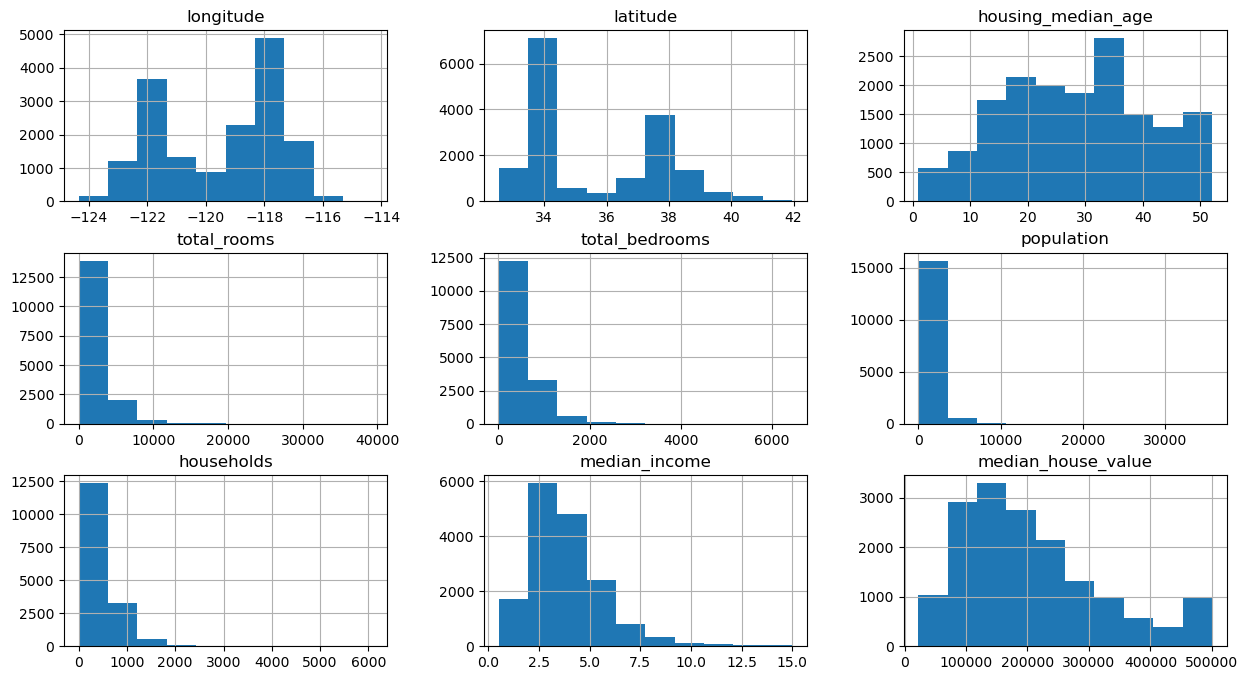

In [13]:
#Make histograms of data from different columns
train_data.hist(figsize=(15, 8))

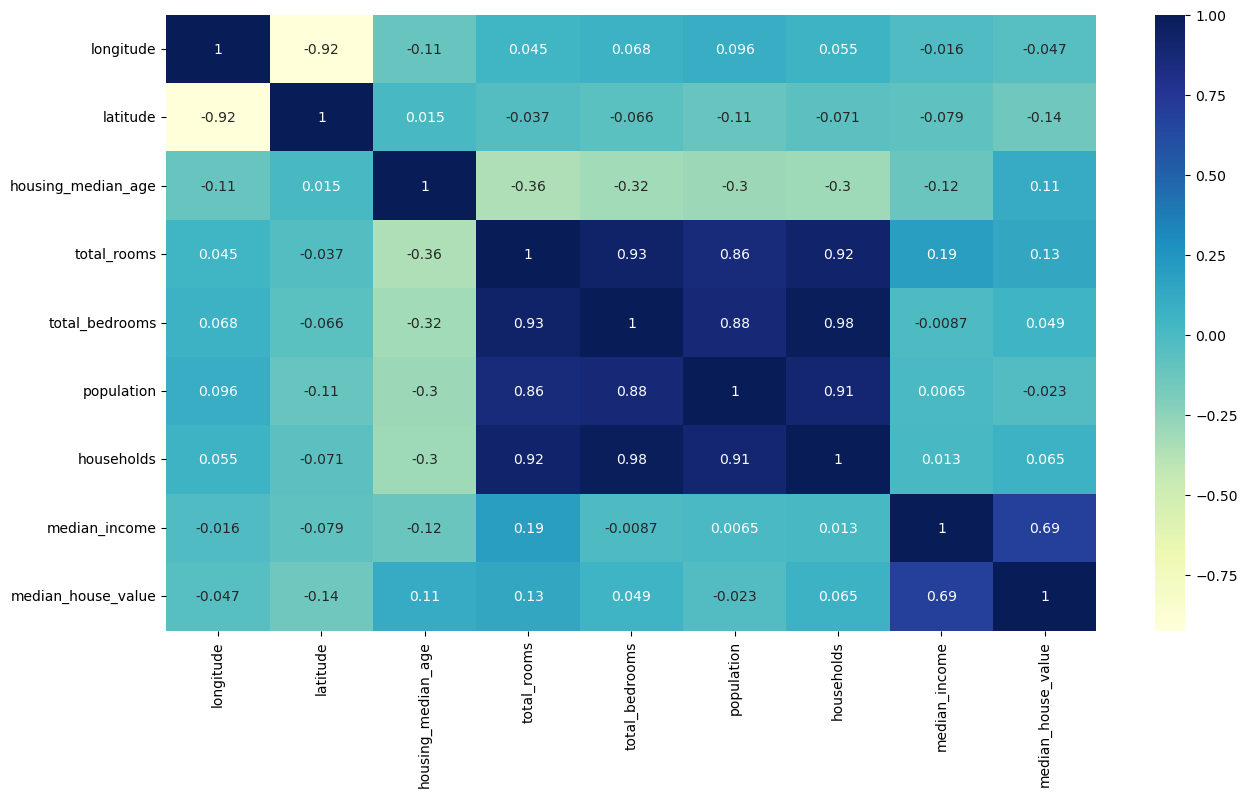

In [14]:
#Create a correlation matrix
plt.figure(figsize=(15, 8))
sns.heatmap(train_data.corr(), annot=True, cmap="YlGnBu")
plt.show()

In [15]:
#Count the distribution of selected columns
train_data["total_rooms"] = np.log(train_data["total_rooms"] + 1)
train_data["total_bedrooms"] = np.log(train_data["total_bedrooms"] + 1)
train_data["population"] = np.log(train_data["population"] + 1)
train_data["households"] = np.log(train_data["households"] + 1)

array([[<AxesSubplot:title={'center':'longitude'}>,
        <AxesSubplot:title={'center':'latitude'}>,
        <AxesSubplot:title={'center':'housing_median_age'}>],
       [<AxesSubplot:title={'center':'total_rooms'}>,
        <AxesSubplot:title={'center':'total_bedrooms'}>,
        <AxesSubplot:title={'center':'population'}>],
       [<AxesSubplot:title={'center':'households'}>,
        <AxesSubplot:title={'center':'median_income'}>,
        <AxesSubplot:title={'center':'median_house_value'}>]],
      dtype=object)

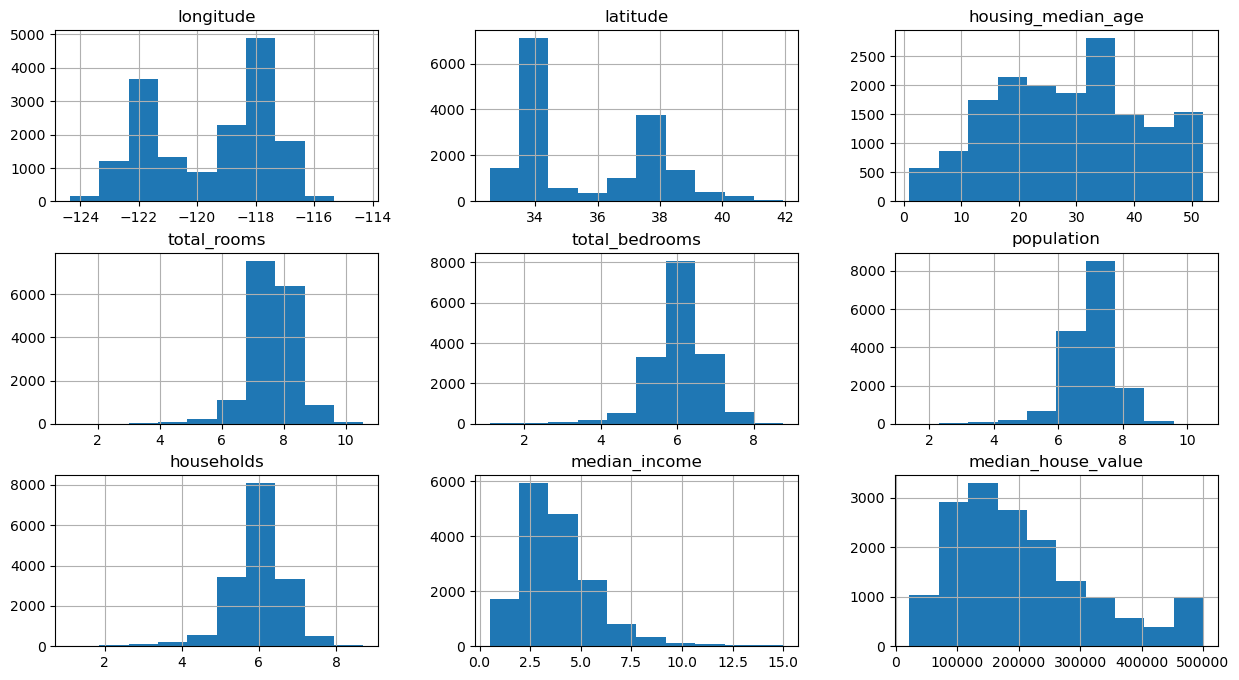

In [16]:
#Create histograms of training data
train_data.hist(figsize=(15,8))

In [17]:
train_data.ocean_proximity.value_counts()

<1H OCEAN     7238
INLAND        5150
NEAR OCEAN    2109
NEAR BAY      1845
ISLAND           4
Name: ocean_proximity, dtype: int64

In [18]:
train_data= train_data.join(pd.get_dummies(train_data.ocean_proximity)).drop(["ocean_proximity"],axis=1)



In [19]:
train_data.head()

,longitude,latitude,housing_median_age,total_rooms,total_bedrooms,population,households,median_income,median_house_value,<1H OCEAN,INLAND,ISLAND,NEAR BAY,NEAR OCEAN
8547,-118.35,33.88,36.0,7.367709,6.021023,7.001246,5.860786,4.0737,238200.0,1,0,0,0,0
17344,-120.43,34.86,17.0,8.062433,6.228511,7.338888,6.161207,4.3125,168100.0,1,0,0,0,0
2158,-119.81,36.77,49.0,7.467371,5.752573,6.559615,5.707110,3.1500,72200.0,0,1,0,0,0
7183,-118.19,34.05,29.0,6.752270,5.298317,6.666957,5.135798,2.6964,122200.0,1,0,0,0,0
6250,-117.98,34.04,34.0,7.843064,6.287859,7.653969,6.212606,3.4722,154600.0,1,0,0,0,0


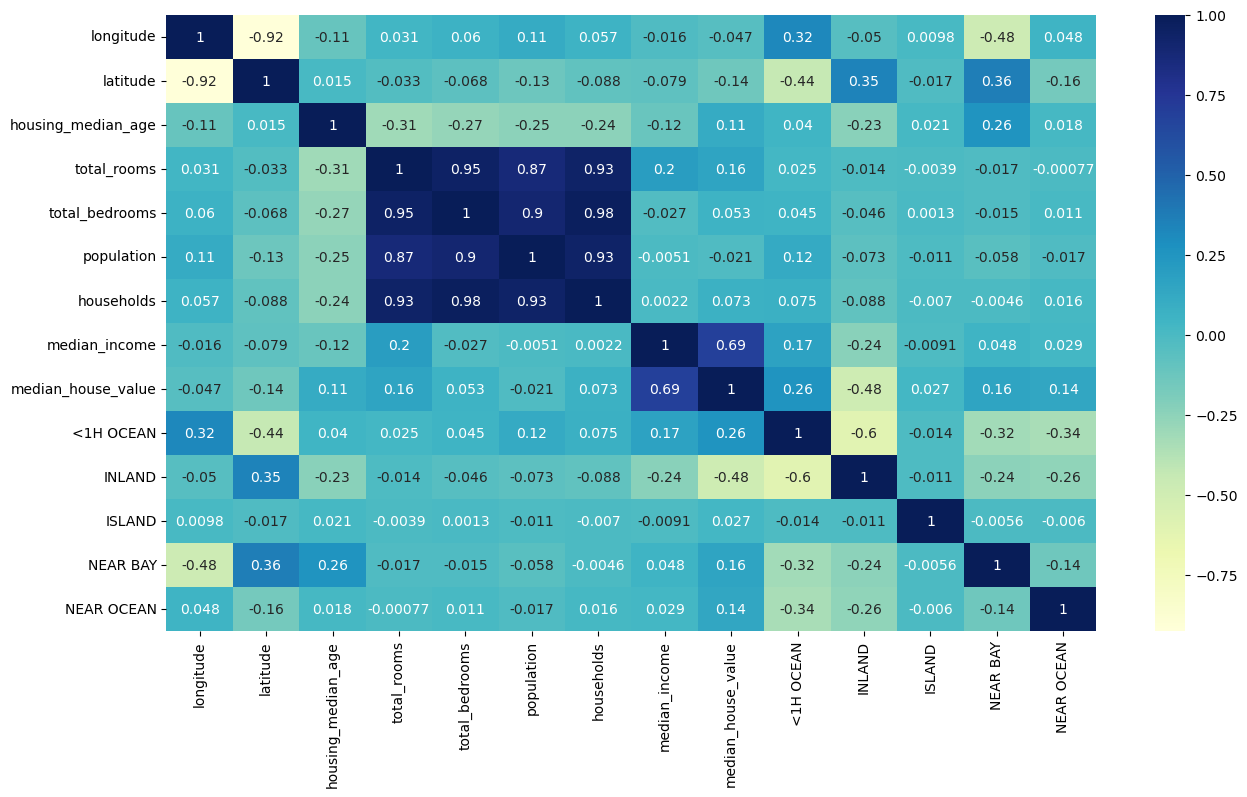

In [20]:
#Create correlation matrix
plt.figure(figsize=(15, 8))
sns.heatmap(train_data.corr(), annot=True, cmap="YlGnBu")
plt.show()

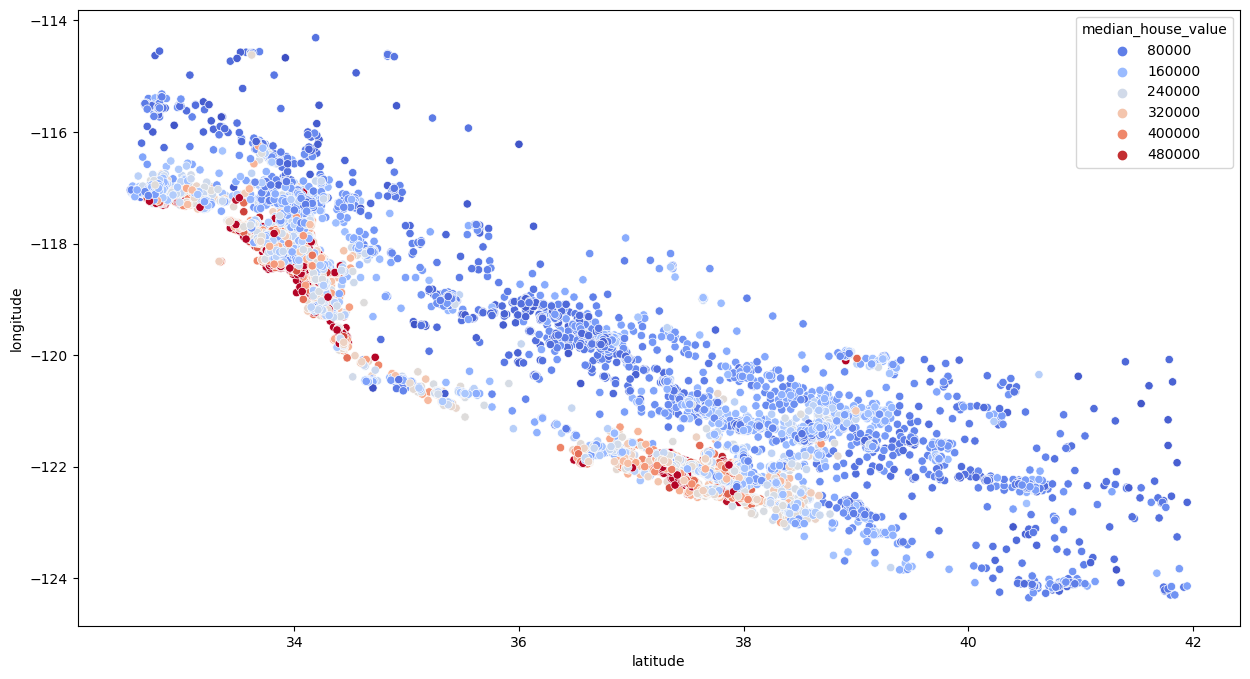

In [21]:
#Create scatterplot of median house values in California area
plt.figure(figsize=(15, 8))
sns.scatterplot(x="latitude", y="longitude", data=train_data, hue="median_house_value", palette="coolwarm")
plt.show()

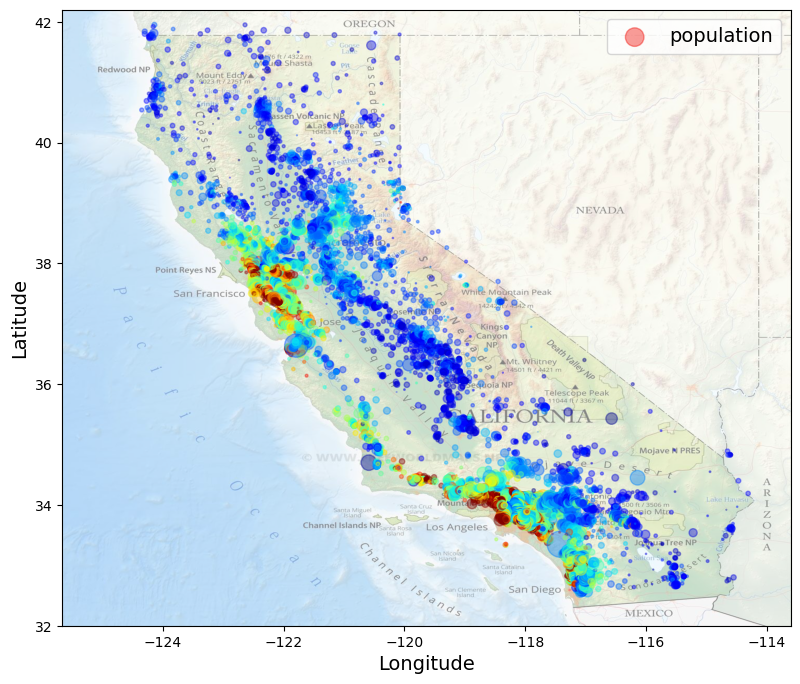

In [22]:
import matplotlib.pyplot as plt
import matplotlib.image as mpimg
import pandas as pd
from matplotlib import cm

housing = pd.read_csv('housing.csv')

#Create a map of median house value and population in California reagion
ax = housing.plot(kind="scatter", x="longitude", y="latitude", alpha=0.4,
                  s=housing['population']/100, label="population", figsize=(13,8),
                  c="median_house_value", cmap=cm.get_cmap("jet"), colorbar=False)

california_img = mpimg.imread('california-map.jpg')
plt.imshow(california_img, extent=[-125.67, -113.6, 32.0, 42.2], alpha=0.5,
           cmap=cm.get_cmap("jet"))

plt.xlabel("Longitude", fontsize=14)
plt.ylabel("Latitude", fontsize=14)
plt.legend(fontsize=14)

plt.show()

In [23]:
train_data["bedroom_ratio"] = train_data["total_bedrooms"] / train_data["total_rooms"]
train_data["household_rooms"] = train_data["total_rooms"] / train_data["households"]

<AxesSubplot:>

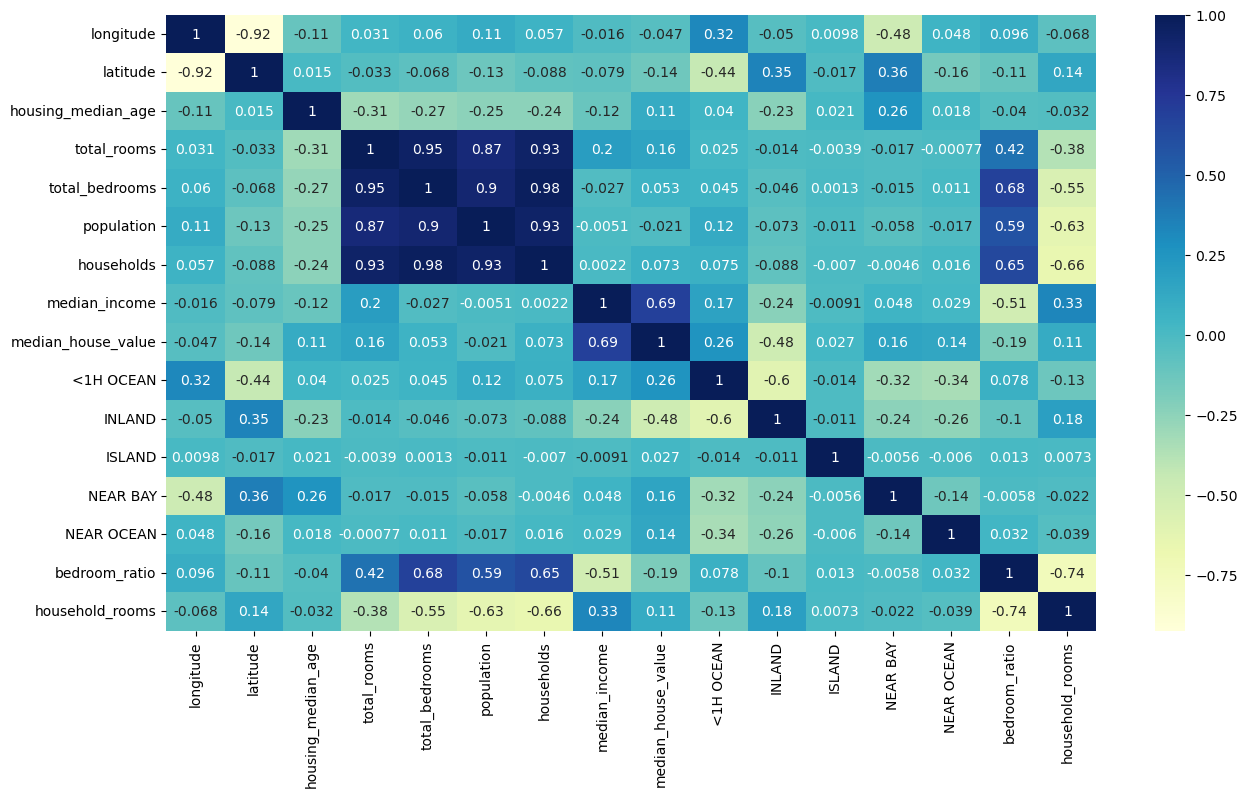

In [24]:
#Create a new correlation matrix 
plt.figure(figsize = (15,8))
sns.heatmap(train_data.corr(), annot=True, cmap = "YlGnBu")

In [25]:
from sklearn.linear_model import LinearRegression
from sklearn.preprocessing import StandardScaler

scaler= StandardScaler()

X_train, y_train = train_data.drop(["median_house_value"], axis=1), train_data["median_house_value"]
X_train_s=scaler.fit_transform(X_train)

reg = LinearRegression()
reg.fit(X_train_s, y_train)

LinearRegression()

In [26]:
test_data = X_test.join(y_test)

test_data["total_rooms"] = np.log(test_data["total_rooms"] + 1)
test_data["total_bedrooms"] = np.log(test_data["total_bedrooms"] + 1)
test_data["population"] = np.log(test_data["population"] + 1)
test_data["households"] = np.log(test_data["households"] + 1)

test_data=test_data.join(pd.get_dummies(test_data.ocean_proximity)).drop(["ocean_proximity"],axis=1)

test_data["bedroom_ratio"]=test_data["total_bedrooms"]/test_data["total_rooms"]
test_data["household_rooms"] = test_data["total_rooms"] / test_data["households"]



In [27]:
test_data

,longitude,latitude,housing_median_age,total_rooms,total_bedrooms,population,households,median_income,median_house_value,<1H OCEAN,INLAND,ISLAND,NEAR BAY,NEAR OCEAN,bedroom_ratio,household_rooms
19469,-120.99,37.68,28.0,8.092545,6.473891,7.375256,6.426488,2.2336,112700.0,0,1,0,0,0,0.799982,1.259248
19433,-121.04,37.65,8.0,7.580700,5.940171,6.903747,5.902633,3.3567,129100.0,0,1,0,0,0,0.783591,1.284291
15837,-122.44,37.75,52.0,7.361375,5.814131,6.587550,5.826000,5.0505,380400.0,0,0,0,1,0,0.789816,1.263538
20206,-119.22,34.27,30.0,7.569412,5.690359,6.545350,5.749393,5.0679,234300.0,0,0,0,0,1,0.751757,1.316558
19851,-119.21,36.39,31.0,7.290293,5.717028,6.921658,5.697093,2.0363,53500.0,0,1,0,0,0,0.784197,1.279651
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1359,-121.97,38.03,17.0,8.212297,6.530878,7.570443,6.476972,3.7043,139800.0,0,1,0,0,0,0.795256,1.267922
11142,-117.95,33.84,34.0,7.114769,5.375278,6.943122,5.389072,3.5455,180000.0,1,0,0,0,0,0.755510,1.320222
11549,-118.01,33.74,25.0,9.000976,7.142827,8.192570,7.117206,6.0609,264900.0,1,0,0,0,0,0.793561,1.264678
4998,-118.29,33.99,46.0,7.695758,6.274762,7.634337,6.210600,2.0542,103400.0,1,0,0,0,0,0.815353,1.239133


In [28]:
X_test, y_test = test_data.drop(["median_house_value"], axis=1), test_data["median_house_value"] 

In [29]:
X_test_s=scaler.transform(X_test)

In [30]:
#Count the regression score
reg.score(X_test_s, y_test)

0.6724311975194974

In [31]:
from sklearn.ensemble import RandomForestRegressor

#Implement RandomForest
forest = RandomForestRegressor()

#Fit the training data to model
forest.fit(X_train_s, y_train)

RandomForestRegressor()

In [32]:
#Count score for random forest
forest.score(X_test_s,y_test)

0.8186938928189311

In [33]:
from sklearn.model_selection import GridSearchCV
param_grid={
    "n_estimators":[100,200,300],
    "min_samples_split":[2,4],
    "max_depth": [None, 4,8]
}

grid_search=GridSearchCV(forest,param_grid,cv=5,
                        scoring="neg_mean_squared_error",
                        return_train_score= True)
grid_search.fit(X_train_s, y_train)

KeyboardInterrupt: 

In [ ]:
grid_search.best_estimator_

RandomForestRegressor(min_samples_split=4, n_estimators=300)

In [ ]:
grid_search.best_estimator_.score(X_test_s, y_test)

0.8177322553697408

In [51]:
scaler = StandardScaler()
X_train_scaled = scaler.fit_transform(X_train)
X_test_scaled = scaler.transform(X_test)

forest = RandomForestRegressor()
forest.fit(X_train_scaled, y_train)

predicted_prices = forest.predict(X_test_scaled)
price_comparison = pd.DataFrame({
    'Actual Price': y_test,
    'Predicted Price': predicted_prices
})

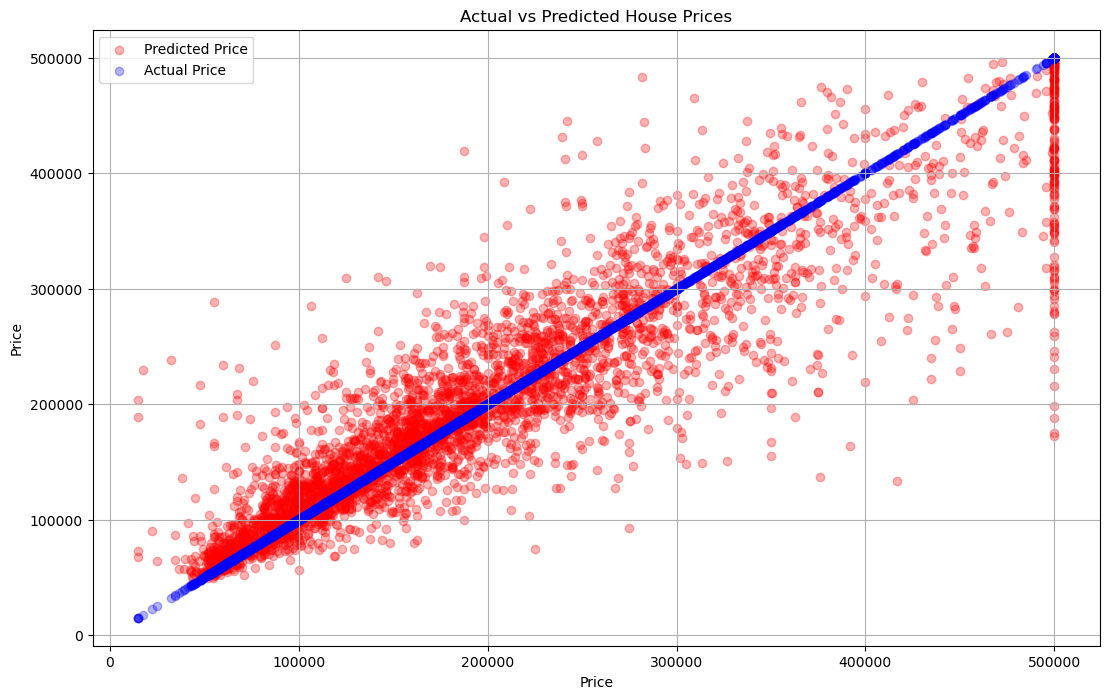

In [54]:
plt.figure(figsize=(13, 8))
plt.scatter(price_comparison['Actual Price'], price_comparison['Predicted Price'], color='red', alpha=0.3, label='Predicted Price')
plt.scatter(price_comparison['Actual Price'], price_comparison['Actual Price'], color='blue', alpha=0.3, label='Actual Price')
plt.title('Actual vs Predicted House Prices')
plt.xlabel('Price')
plt.ylabel('Price')
plt.legend()
plt.grid(True)
plt.show()